# Gauss-Newton and Levenberg-Marquardt

We illustrate the GN and LM methods using the ODE parameter ID problem.

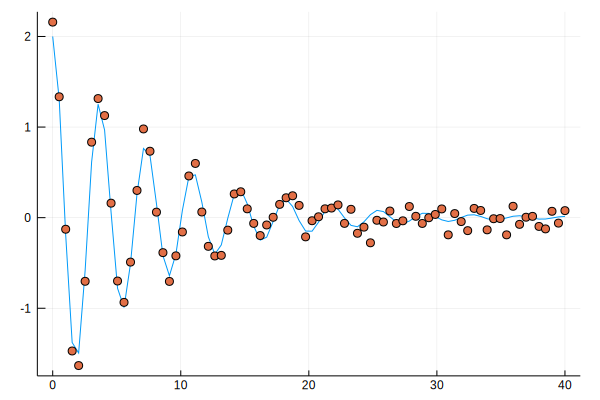

In [11]:
using DifferentialEquations,Plots,Calculus

# Time derivative in the ODE
function dydt(ydot,y,p,t) 
    ydot[1] = y[2]
    ydot[2] = -p[1]*y[2]-p[2]*y[1]
end

# Solution of the model
function SHO(p,t)
    ode = ODEProblem(dydt,[2.,0],(0.,40.),p)
    sol = solve(ode,abstol=1e-13,reltol=1e-12)
    return sol.(t,idxs=1)
end

t = range(0,stop=40,length=80)
exact = SHO([0.25,3.],t) 
data = exact + 0.1*randn(80)
plot(t,exact,leg=false)
scatter!(t,data,leg=false)

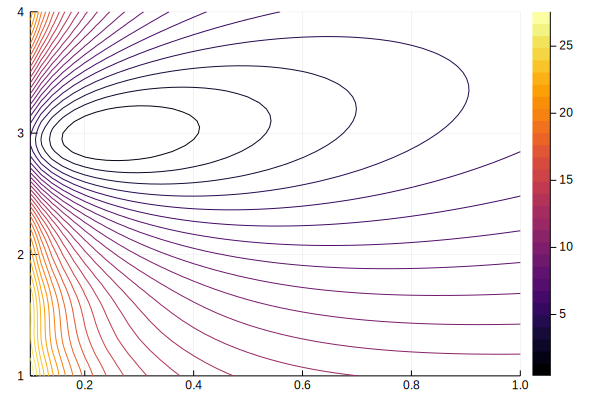

In [12]:
misfit(p) = SHO(p,t) - data
obj(x) = sum(misfit(x).^2)/2
contour(0.1:.02:1,1:.05:4,(c,k)->obj([c,k]),levels=30)

In contrast to the true Newton method, in GN we don't try to use the exact Hessian of the objective function. The benefit is that we need only the Jacobian of the misfit vector, and no second derivatives. The iterative model problems are linear least squares.

In [13]:
jac(p) = Calculus.finite_difference_jacobian(misfit,p)

xgn = [.3,2.9]

for k = 1:8
    @show xc = xgn[:,end]
    s = -jac(xc)\misfit(xc)
    xgn = [xgn xc+s]
end

xc = xgn[:, end] = [0.3, 2.9]
xc = xgn[:, end] = [0.235746, 3.00739]
xc = xgn[:, end] = [0.242955, 2.98314]
xc = xgn[:, end] = [0.241317, 2.98027]
xc = xgn[:, end] = [0.241375, 2.98004]
xc = xgn[:, end] = [0.241366, 2.98002]
xc = xgn[:, end] = [0.241366, 2.98002]
xc = xgn[:, end] = [0.241366, 2.98002]


Typically GN is mediocre at handling poor initial guesses.

In [15]:
xgn = [.1,5]

for k = 1:10
    @show xc = xgn[:,end]
    s = -jac(xc)\misfit(xc)
    xgn = [xgn xc+s]
end

xc = xgn[:, end] = [0.1, 5.0]
xc = xgn[:, end] = [0.222708, 5.0069]
xc = xgn[:, end] = [0.475433, 4.99763]
xc = xgn[:, end] = [1.06592, 4.61475]
xc = xgn[:, end] = [0.453831, 0.841385]
xc = xgn[:, end] = [0.917051, 1.16185]
xc = xgn[:, end] = [2.44105, 3.02538]
xc = xgn[:, end] = [1.67862, 6.61892]
xc = xgn[:, end] = [1.64481, 0.4487]
xc = xgn[:, end] = [13.4866, 3.98643]


## L-M

LM can be thought of as globalizing the convergence of GN. We introduce a damping parameter that gives a descent direction when the GN step would fail.

In [29]:
using LinearAlgebra
xgn = [.1,6]

for k = 1:50
    xc = xgn[:,end]
    F = misfit(xc)
    μ = norm(F)
    @show (xc,μ)
    s = -[jac(xc);μ*I] \ [F;0;0]
    xgn = [xgn xc+s]
end

(xc, μ) = ([0.1, 6.0], 7.49944382140859)
(xc, μ) = ([0.217611, 6.00469], 5.862692412739594)
(xc, μ) = ([0.423891, 6.00749], 4.874449573022055)
(xc, μ) = ([0.713946, 5.98323], 4.2671196114174235)
(xc, μ) = ([0.966605, 5.92513], 3.966514552384921)
(xc, μ) = ([1.15022, 5.85434], 3.8163190399023303)
(xc, μ) = ([1.28218, 5.7826], 3.733305671102301)
(xc, μ) = ([1.37821, 5.71374], 3.683074273277868)
(xc, μ) = ([1.44877, 5.6486], 3.650235094137981)
(xc, μ) = ([1.50068, 5.58703], 3.6272337966312627)
(xc, μ) = ([1.5385, 5.52858], 3.6100576455868425)
(xc, μ) = ([1.56535, 5.47274], 3.596430890382251)
(xc, μ) = ([1.58344, 5.41899], 3.584989702776493)
(xc, μ) = ([1.59439, 5.36688], 3.5748763905533876)
(xc, μ) = ([1.59939, 5.316], 3.565526915132974)
(xc, μ) = ([1.59933, 5.26596], 3.556553404350995)
(xc, μ) = ([1.59491, 5.21644], 3.547675936174365)
(xc, μ) = ([1.58665, 5.16711], 3.5386810388013266)
(xc, μ) = ([1.57496, 5.11768], 3.529395173153922)
(xc, μ) = ([1.56014, 5.06786], 3.519666775880623)
(xc,

Much better heuristics are available for choosing $\mu$. But you can see how LM keeps you in the game until Newton can take over.